<a href="https://colab.research.google.com/github/71unxv/5TieUp-IndoEarthHack/blob/master/TSZ_ML_HIGH_DIMENSION_NO_HYPERPARAMETER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tunu Shallow Zone Machine Learning Application
## Objective :
#### Gas & Coal discrimination
#### Classifier must be able to be extracted as an equation.
## Parameter Data :
#### -NEAR
#### -MID
#### -FAR
#### -UFAR
#### -VELOCITY
#### -SUBSTACK GRADIENT

## CLASSIFIER ALGORITHM WILL PROBABLY USE:
#### -DECISION TREES
#### -SUPPORTED VECTOR MACHINE

## PARAMETER :
#### -TRIAL AND ERROR
#### -NO HYPER PARAMETER TUNING

## MODEL VALIDATION/JUSTIFICATION
#### - K-FOLD CROSS VALIDATION

#### --------------------------------------------------------
##### Muhammad Irsyad Hibatullah


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display as display_DF
import seaborn as sns

In [2]:
All_DB = pd.read_excel("2019_TSZ_Raw_Data.xlsx", sheet_name="Raw Data", skiprows=1)
All_DB = All_DB.dropna()
All_DB = All_DB[All_DB['Netpay Flag'] != 'Not Active']
# All_DB = All_DB[All_DB['Velocity'] == 'scott']
display_DF(All_DB)


,ID_Well_Res,Well Name,Reservoir Name,Fluid Status,GTS,X,Y,Z,Netpay Flag,Actual Netpay,Top Coal,Base Coal,Top Full,Base Full,Velocity by Depth,Amplitude RMS,Predicted Netpay,Gas Discrimination Flag,Far Stack Amplitude NoScale,Ultrafar Amplitude NoScale,Velocity interval GGW 3.4,Resolution,Near Stack Amplitude Scaled,Mid Stack Amplitude Scaled,Far Stack Amplitude Scaled,Ultrafar Amplitude Scaled,Far/UF Ratio,SubStack Gradient,Proportion Flag,Proportion Values_0.8,Proportion Values_0.4,Resources Flag,EUR,Geomodel
0,TN-B15A146,TN-B15,A146,Gas,B,565618.000,9927444.000,926.70,Blindtest,10.30,919.00,920.90,-11899.721680,18614.564453,1593.775284,15622.185920,10.226181,Blindtest,-6784.365234,-8690.208984,2328.941406,17.440329,-7709.664258,-10451.934375,-7462.801757,-17380.417968,1.570620,-2602.312851,Active,0.74,0.9724,Not Active,0.000000,6.630000
1,TN-C106A133,TN-C106,A133,Gas,C,563992.000,9920795.000,751.75,Blindtest,8.78,747.00,748.60,-8706.531250,7641.524902,1553.356248,8191.354871,3.016576,Blindtest,-4439.172363,-981.349182,2065.873047,21.939749,-6455.654883,-7201.983594,-4883.089599,-1962.698364,-0.487947,1579.776355,Active,0.52,0.9589,Not Active,0.000000,2.250000
2,TN-C103A127,TN-C103,A127,Gas,C,564087.000,9920795.000,749.50,Blindtest,11.30,745.00,746.25,-8443.037109,6264.868164,1553.030142,7434.159291,2.046210,Blindtest,-6606.126465,-2336.877930,1955.830200,22.121679,-5788.109765,-5719.401562,-7266.739112,-4673.755860,0.445204,179.572417,Active,0.52,0.9589,Not Active,0.000000,2.250000
4,TN-C19A127,TN-C19,A127,Gas,C,564479.000,9920912.000,752.66,Blindtest,5.58,744.00,746.40,-10340.473633,6397.065430,1553.488140,8597.902101,3.720036,Blindtest,-5174.421387,-1881.958740,1957.077026,22.734625,-8253.674414,-7809.989062,-5691.863526,-3763.917480,0.487782,1558.739634,Active,0.52,0.9589,Not Active,0.000000,2.250000
5,TN-C116A133,TN-C116,A133,Gas,C,564540.000,9920940.000,748.80,Blindtest,12.00,740.70,743.10,-10355.209961,6274.523926,1552.928687,8561.542613,3.687399,Blindtest,-4485.191895,-1935.882080,1948.438965,22.823410,-9302.472656,-6744.703906,-4933.711085,-3871.764160,0.725720,1810.311831,Active,0.52,0.9589,Not Active,0.000000,2.250000
6,TN-C26A145,TN-C26,A145,Gas,C,564776.000,9921009.000,744.50,Blindtest,15.90,740.00,742.50,-7643.182129,4435.074219,1552.305462,6248.524481,0.551112,Blindtest,-3478.180664,-1068.504761,2194.399902,23.205919,-5924.505469,-5842.509766,-3825.998730,-2137.009522,0.209648,1337.899887,Active,0.52,0.9589,Not Active,0.000000,2.250000
7,TN-C50A145,TN-C50,A145,Gas,C,564806.000,9921003.000,746.46,Blindtest,15.24,741.13,744.70,-7015.611328,4983.140625,1552.589536,6084.837417,0.330856,Blindtest,-2680.132080,-591.792664,1953.479126,23.319534,-6310.947656,-4883.594531,-2948.145288,-1183.585328,-0.490860,1731.753623,Active,0.52,0.9589,Active,4.870000,2.250000
8,TN-C26A139,TN-C26,A139,Gas,C,564739.000,9920978.000,642.40,Blindtest,11.20,639.90,641.00,-10561.466797,6794.111816,1537.507487,8879.879962,3.883789,Blindtest,-5542.748535,-2655.661621,1958.026978,21.997818,-7844.350781,-9543.734375,-6097.023388,-5311.323242,0.852071,1104.579360,Active,0.87,1.0000,Not Active,0.000000,1.160000
9,TN-C10A128,TN-C10,A128,Gas,C,564667.000,9920856.000,647.25,Blindtest,8.30,647.25,647.25,-12513.874023,7489.075684,1538.210427,10312.208727,5.799387,Blindtest,-5647.918945,-3835.889160,1949.855103,22.137308,-9414.924023,-11574.087500,-6212.710840,-7671.778320,1.190186,1059.081377,Active,0.87,1.0000,Not Active,0.000000,1.160000
10,TN-C116A128,TN-C116,A128,Gas,C,564557.000,9920932.000,649.20,Blindtest,5.80,644.34,645.40,-7411.115234,5536.188477,1538.493053,6541.177718,0.826340,Blindtest,-4436.014648,-3175.326172,1962.519165,21.918119,-6611.183789,-5223.600782,-4879.616113,-6350.652344,1.231635,112.557900,Active,0.87,1.0000,Not Active,0.000000,1.160000


In [5]:
print(list(All_DB))

['ID_Well_Res', 'Well Name', 'Reservoir Name', 'Fluid Status', 'GTS', 'X', 'Y', 'Z', 'Netpay Flag', 'Actual Netpay', 'Top Coal', 'Base Coal', 'Top Full', 'Base Full', 'Velocity by Depth', 'Amplitude RMS', 'Predicted Netpay', 'Gas Discrimination Flag', 'Far Stack Amplitude NoScale', 'Ultrafar Amplitude NoScale', 'Velocity interval GGW 3.4', 'Resolution', 'Near Stack Amplitude Scaled', 'Mid Stack Amplitude Scaled', 'Far Stack Amplitude Scaled', 'Ultrafar Amplitude Scaled', 'Far/UF Ratio', 'SubStack Gradient', 'Proportion Flag', 'Proportion Values_0.8', 'Proportion Values_0.4', 'Resources Flag', 'EUR', 'Geomodel']


### Training and Cross Validate Data


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import datasets
from sklearn import svm
import seaborn as sns



TSZ_clf = svm.SVC(kernel = 'linear', C=50, random_state=0)
# scoring = ['precision_macro', 'recall_macro']
# scores = cross_validate(TSZ_clf,
#                         All_DB[['Far Stack Amplitude Scaled', 'Ultrafar Amplitude Scaled']],
#                         All_DB[['Fluid Status']],
#                         scoring=scoring,
#                         cv=3)
# sorted(scores.keys())

# scores['test_recall_macro']   

In [22]:

def make_meshgrid(x, y, h=250):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = -30000 - 1, 5000 + 1
    y_min, y_max = -30000 - 1, 5000 + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.unique(Z, return_inverse=True)[1].tolist()
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)
    
#     print((Z))
    out = ax.contourf(xx, yy, Z, alpha = 0.2)
    
    return out
  
  
  
  
  
xx, yy = make_meshgrid(x = All_DB[['Ultrafar Amplitude Scaled']].values,
             y = All_DB[['Far Stack Amplitude Scaled']].values)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


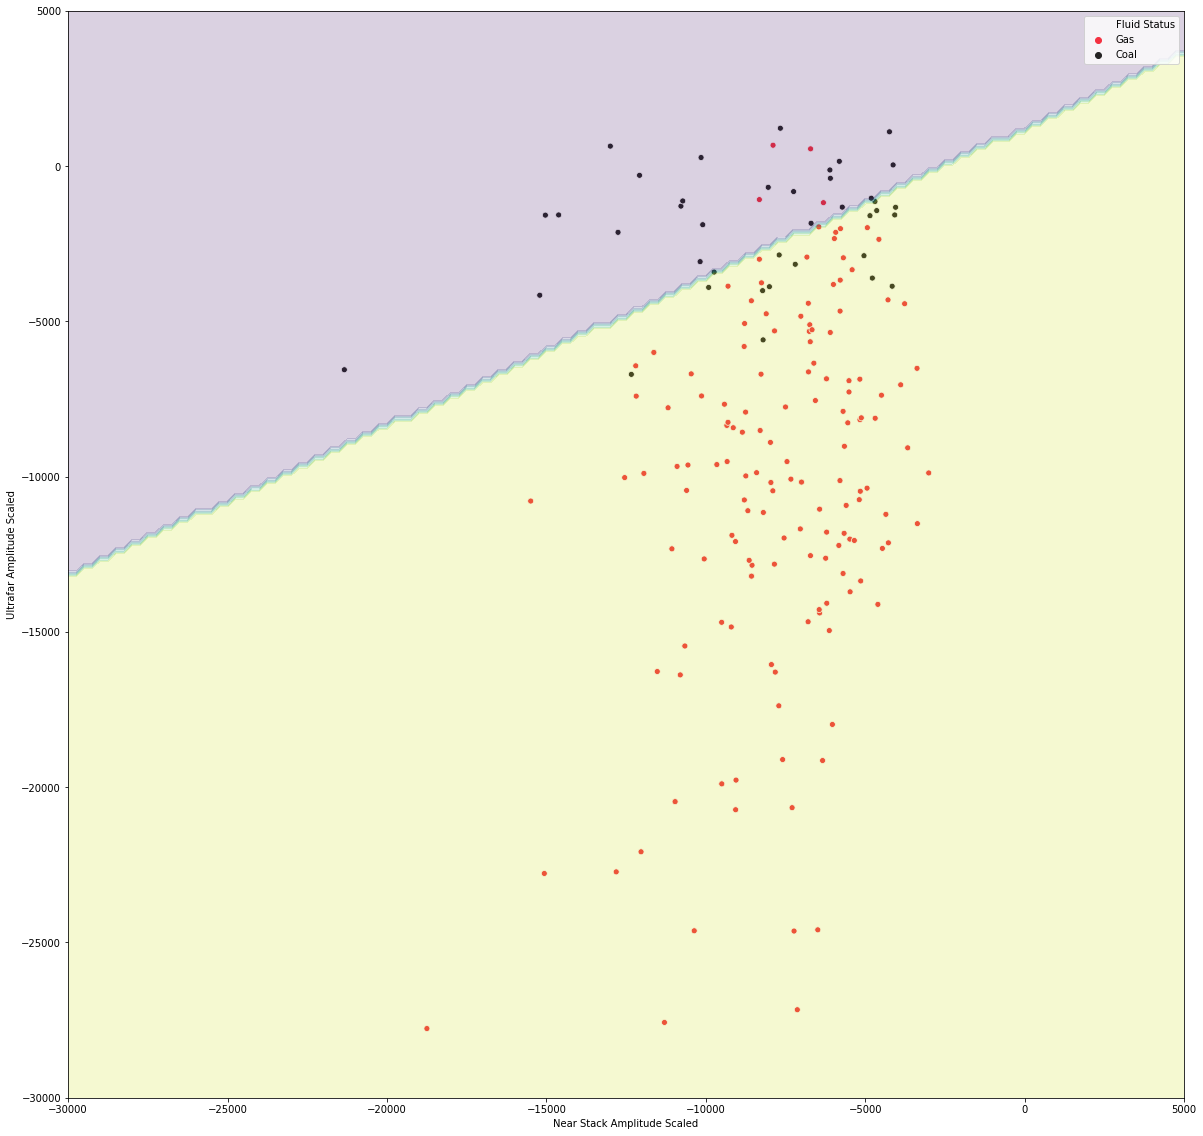

In [23]:
TSZ_clf.fit(All_DB[['Near Stack Amplitude Scaled', 'Ultrafar Amplitude Scaled']],
                        All_DB[['Fluid Status']])
x_min, x_max = -30000 - 1, 5000 + 1
y_min, y_max = -30000 - 1, 5000 + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


GasCoalPalette = dict(Coal = "#252424", Gas = "#f43141")
ax = plt.figure(figsize = (20,20))
ax = sns.scatterplot(x = "Near Stack Amplitude Scaled", y = "Ultrafar Amplitude Scaled", 
            data = All_DB, 
            hue = "Fluid Status", palette = GasCoalPalette)

# plt.title("A Title")
# plt.ylabel("Survived")
# plt.xlabel("Sex")
# plt.ylim(-40000,0) Adjust the limits of the y-axis

plt.xlim(x_min,x_max)
plt.ylim(y_max,y_max)



plot_contours(ax, TSZ_clf, xx, yy)



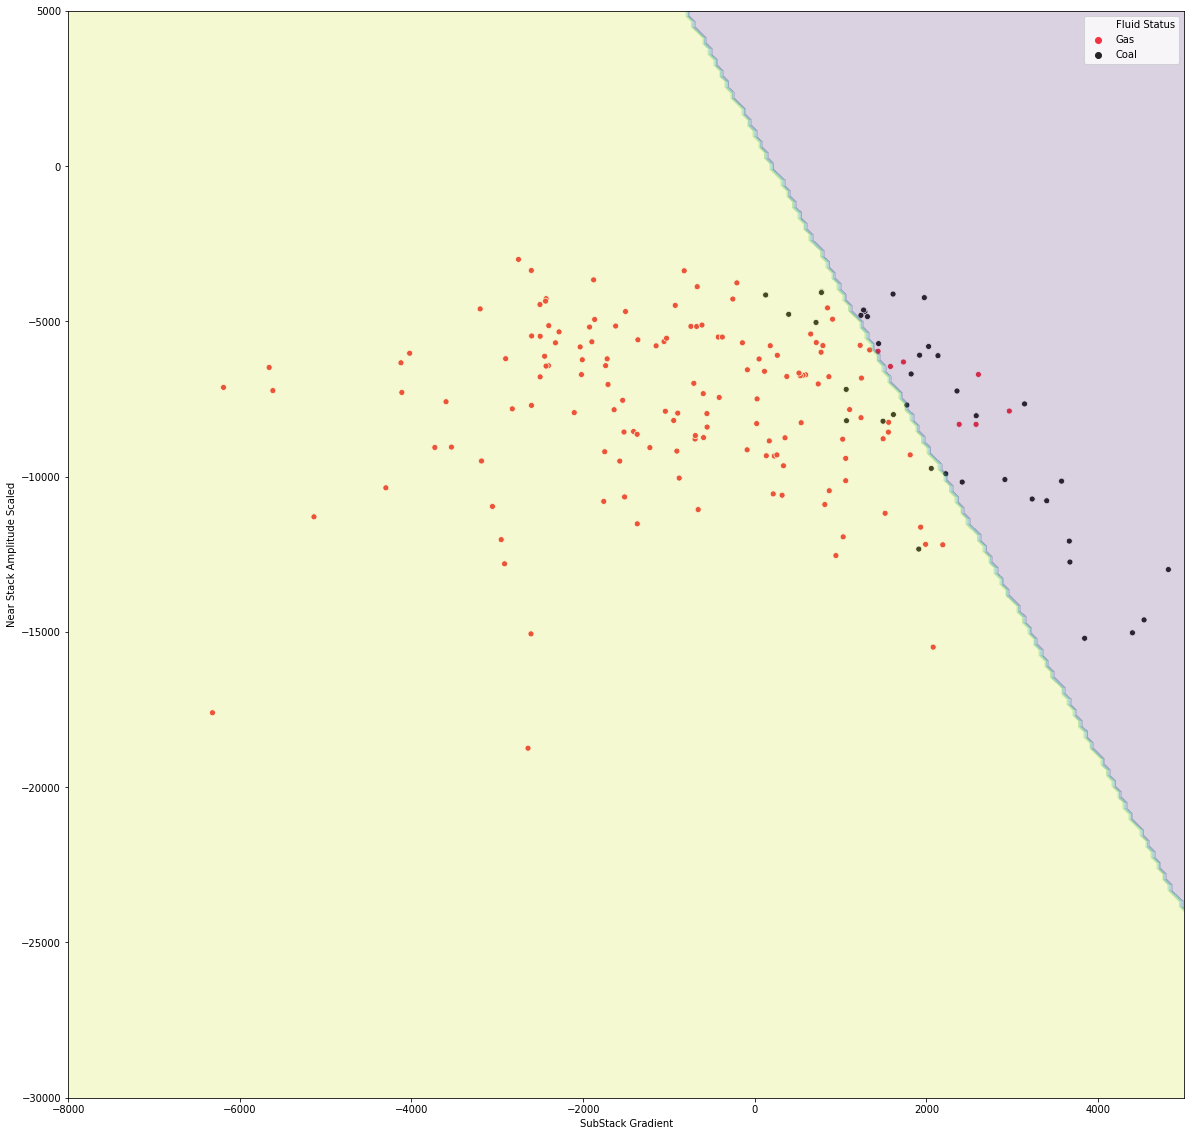

In [32]:
TSZ_clf = svm.SVC(kernel = 'linear', C=1, random_state=0)
TSZ_clf.fit(All_DB[['SubStack Gradient', 'Near Stack Amplitude Scaled']],
                        All_DB[['Fluid Status']])

x_min, x_max = -8000 - 1, 5000 + 1
y_min, y_max = -30000 - 1, 5000 + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

GasCoalPalette = dict(Coal = "#252424", Gas = "#f43141")
ax = plt.figure(figsize = (20,20))
ax = sns.scatterplot(x = "SubStack Gradient", y = "Near Stack Amplitude Scaled", 
            data = All_DB, 
            hue = "Fluid Status", palette = GasCoalPalette)

# plt.title("A Title")
# plt.ylabel("Survived")
# plt.xlabel("Sex")
# plt.ylim(-40000,0) Adjust the limits of the y-axis
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)


plot_contours(ax, TSZ_clf, xx, yy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


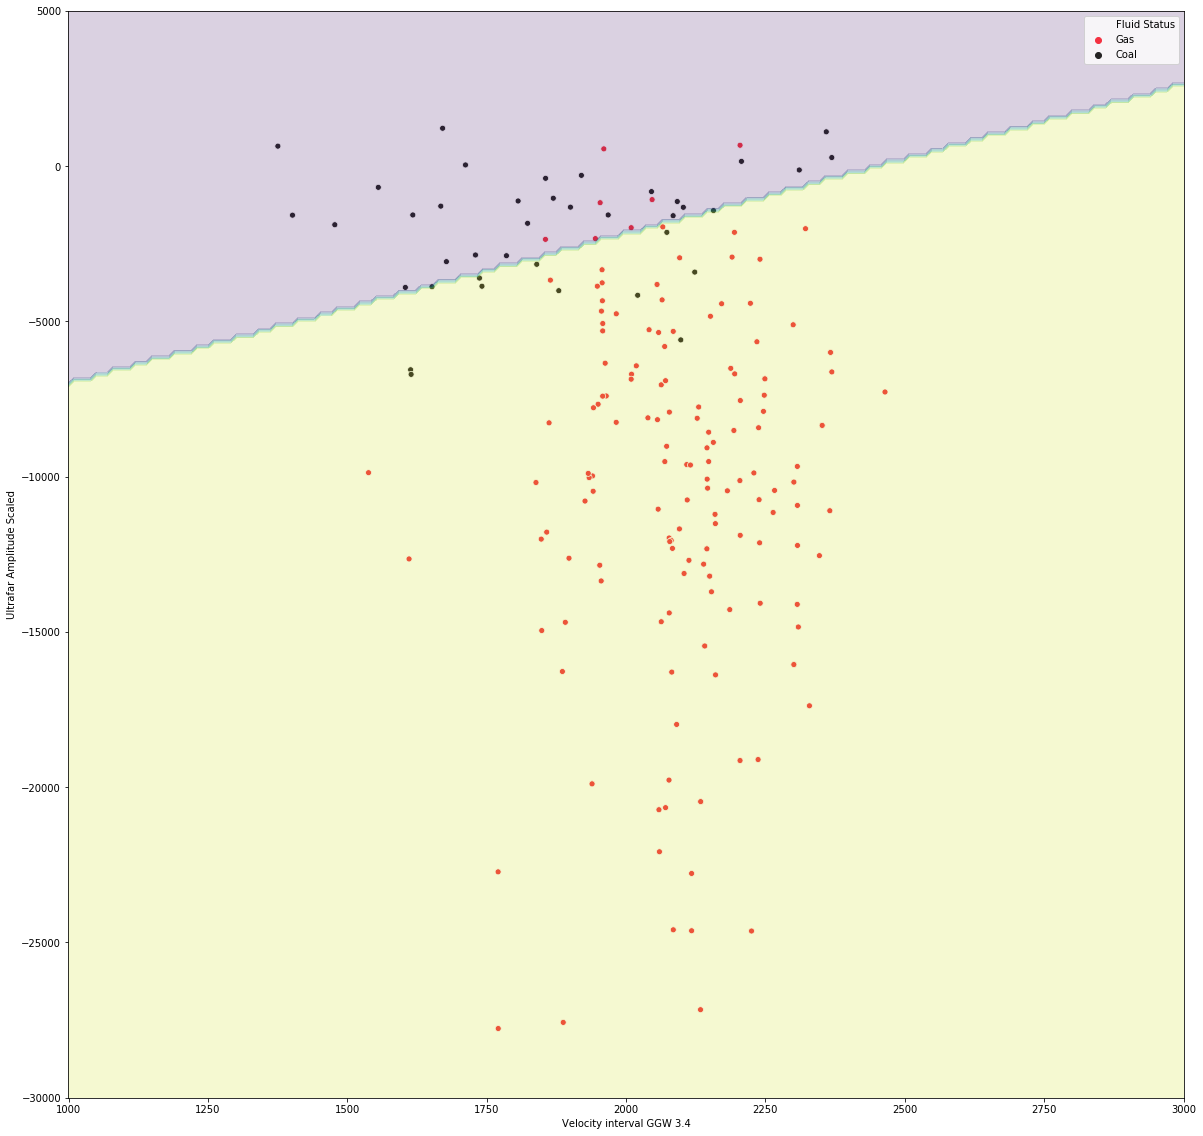

In [34]:
TSZ_clf = svm.SVC(kernel = 'linear', C=1, random_state=0)
TSZ_clf.fit(All_DB[['Velocity interval GGW 3.4', 'Ultrafar Amplitude Scaled']],
                        All_DB[['Fluid Status']])


x_min, x_max = 1000 - 1, 3000 + 1
y_min, y_max = -30000 - 1, 5000 + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))


GasCoalPalette = dict(Coal = "#252424", Gas = "#f43141")
ax = plt.figure(figsize = (20,20))
ax = sns.scatterplot(x = "Velocity interval GGW 3.4", y = "Ultrafar Amplitude Scaled", 
            data = All_DB, 
            hue = "Fluid Status", palette = GasCoalPalette)

# plt.title("A Title")
# plt.ylabel("Survived")
# plt.xlabel("Sex")
# plt.ylim(-40000,0) Adjust the limits of the y-axis
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)


plot_contours(ax, TSZ_clf, xx, yy)

In [24]:
print(list(All_DB))

['ID_Well_Res', 'Well Name', 'Reservoir Name', 'Fluid Status', 'GTS', 'X', 'Y', 'Z', 'Netpay Flag', 'Actual Netpay', 'Top Coal', 'Base Coal', 'Top Full', 'Base Full', 'Velocity by Depth', 'Amplitude RMS', 'Predicted Netpay', 'Gas Discrimination Flag', 'Far Stack Amplitude NoScale', 'Ultrafar Amplitude NoScale', 'Velocity interval GGW 3.4', 'Resolution', 'Near Stack Amplitude Scaled', 'Mid Stack Amplitude Scaled', 'Far Stack Amplitude Scaled', 'Ultrafar Amplitude Scaled', 'Far/UF Ratio', 'SubStack Gradient', 'Proportion Flag', 'Proportion Values_0.8', 'Proportion Values_0.4', 'Resources Flag', 'EUR', 'Geomodel']
